In [1]:
import pvl
import struct
import matplotlib.pyplot as plt
import numpy as np
import datetime
import os.path
import binascii

In [2]:
crism_file = '/home/arsanders/testData/crism/tsts/mrdr/input/t1865_mrrde_70n185_0256_1.lbl'
image_file = crism_file

In [3]:
header = pvl.load(crism_file)

In [4]:
header

PVLModule([
  ('PDS_VERSION_ID', 'PDS3')
  ('RECORD_TYPE', 'FIXED_LENGTH')
  ('RECORD_BYTES', 3920)
  ('FILE_RECORDS', 30720)
  ('LABEL_REVISION_NOTE',
   '2003-11-19, S. Slavney (GEO); 2005-09-25, S. Murchie (JHU/APL); 2007-03-09, '
   'E. Malaret (ACT Corp.); 2007-09-14, C. Hash (ACT Corp)')
  ('^IMAGE', 'T1865_MRRDE_70N185_0256_1.IMG')
  ('DATA_SET_ID', 'MRO-M-CRISM-5-RDR-MULTISPECTRAL-V1.0')
  ('PRODUCT_ID', 'T1865_MRRDE_70N185_0256_1')
  ('INSTRUMENT_HOST_NAME', 'MARS RECONNAISSANCE ORBITER')
  ('SPACECRAFT_ID', 'MRO')
  ('INSTRUMENT_NAME', 'COMPACT RECONNAISSANCE IMAGING SPECTROMETER FOR MARS')
  ('INSTRUMENT_ID', 'CRISM')
  ('TARGET_NAME', 'MARS')
  ('PRODUCT_TYPE', 'MAP_PROJECTED_MULTISPECTRAL_RDR')
  ('PRODUCT_CREATION_TIME',
   datetime.datetime(2007, 12, 22, 16, 50, 47, 432000, tzinfo=datetime.timezone.utc))
  ('START_TIME', 'N/A')
  ('STOP_TIME', 'N/A')
  ('SPACECRAFT_CLOCK_START_COUNT', 'N/A')
  ('SPACECRAFT_CLOCK_STOP_COUNT', 'N/A')
  ('PRODUCT_VERSION_ID', '1')
  ('PRODU

In [5]:
with open(crism_file, 'rb') as f:
    image_file = os.path.dirname(crism_file) + "/" + header["^IMAGE"].lower()
    with open(image_file, 'rb') as im_f:
        b_image_data = im_f.read()

In [6]:
n_lines = 10
line_length = header['IMAGE']['LINE_SAMPLES'] * (header['IMAGE']['SAMPLE_BITS']//8)

In [7]:
image_data = []
for j in range(n_lines):
    image_sample = np.frombuffer(b_image_data[j*line_length:(j+1)*line_length], dtype=np.float32, count=int(line_length/4))
    image_data.append(image_sample)
image_data = np.array(image_data)

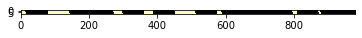

In [8]:
plt.imshow(image_data)

In [9]:
image_fn, image_ext = os.path.splitext(image_file)
mini_image_fn = image_fn + '_cropped' + image_ext
mini_image_bn = os.path.basename(mini_image_fn)

# Overwrite the number of lines in the label
header['IMAGE']['LINES'] = n_lines
header['IMAGE']['BANDS'] = 1
header['^IMAGE'] = mini_image_bn
header['FILE_RECORDS'] = n_lines -1


In [11]:
label_fn, label_ext = os.path.splitext(crism_file)
out_label = label_fn + '_cropped' + label_ext

grammar = pvl.grammar.ISISGrammar()
grammar.comments+=(("#", "\n"), )
encoder = pvl.encoder.ISISEncoder()
pvl.dump(header, out_label, encoder=encoder, grammar=grammar)

3539

In [12]:
with open(mini_image_fn, 'wb+') as f:
    b_reduced_image_data = image_data.tobytes()
    f.seek(0, 2)
    f.write(b_reduced_image_data)